In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Download Mercari stock (Ticker: 4385.T)
mercari = yf.download('4385.T', start='2018-01-01', end='2024-01-01')
mercari = mercari[['Close']]


print("First 5 days:")
print(mercari.head())

print(f"\nTotal trading days: {len(mercari)}")
print(f"Date range: {mercari.index.min().date()} to {mercari.index.max().date()}")

[*********************100%***********************]  1 of 1 completed

First 5 days:
Price        Close
Ticker      4385.T
Date              
2018-06-19  5300.0
2018-06-20  4910.0
2018-06-21  4810.0
2018-06-22  4550.0
2018-06-25  4270.0

Total trading days: 1358
Date range: 2018-06-19 to 2023-12-29


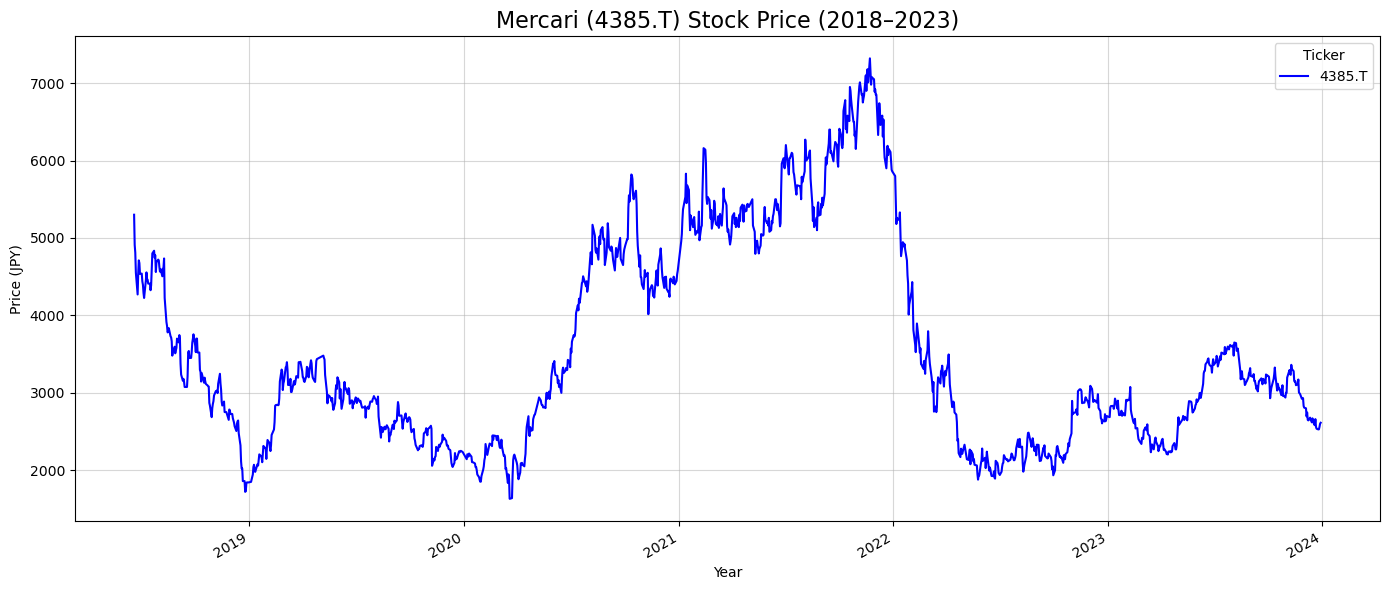

In [3]:
# Plot raw price
mercari['Close'].plot(figsize=(14, 6), color='blue')
plt.title("Mercari (4385.T) Stock Price (2018–2023)", fontsize=16)
plt.ylabel("Price (JPY)")
plt.xlabel("Year")
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

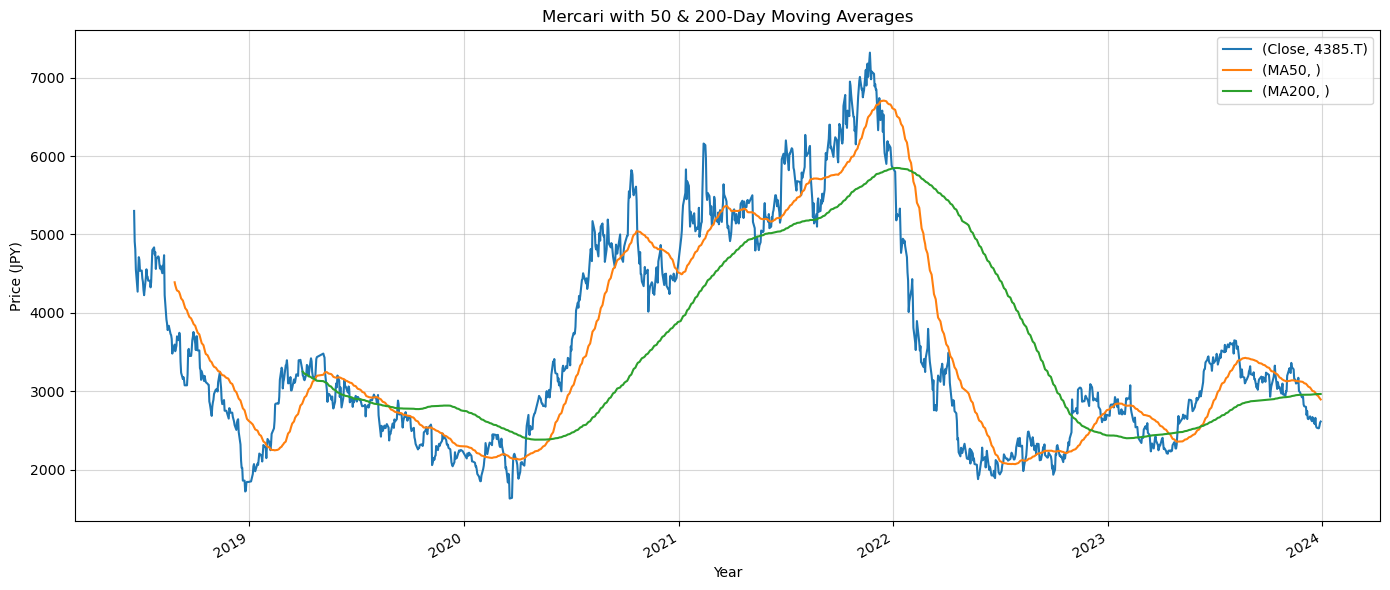

In [4]:
# Add moving averages
mercari['MA50'] = mercari['Close'].rolling(window=50).mean()   
mercari['MA200'] = mercari['Close'].rolling(window=200).mean() 

# Plot price + moving averages

mercari[['Close', 'MA50', 'MA200']].plot(figsize=(14, 6))
plt.title("Mercari with 50 & 200-Day Moving Averages")
plt.ylabel("Price (JPY)")
plt.xlabel("Year")
plt.legend()
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

In [6]:
# Create signals
mercari['Golden'] = (mercari['MA50'] > mercari['MA200']) & (mercari['MA50'].shift(1) <= mercari['MA200'].shift(1))
mercari['Death'] = (mercari['MA50'] < mercari['MA200']) & (mercari['MA50'].shift(1) >= mercari['MA200'].shift(1))


golden_cross_dates = mercari[mercari['Golden']].index
death_cross_dates = mercari[mercari['Death']].index

print("Golden Cross Dates:")
for date in golden_cross_dates:
    print(f"  {date.date()}")

print("Death Cross Dates:")
for date in death_cross_dates:
    print(f"  {date.date()}")

Golden Cross Dates:
  2019-04-23
  2020-05-27
  2022-12-05
  2023-06-09
Death Cross Dates:
  2019-08-27
  2022-02-02
  2023-04-17
  2023-12-22


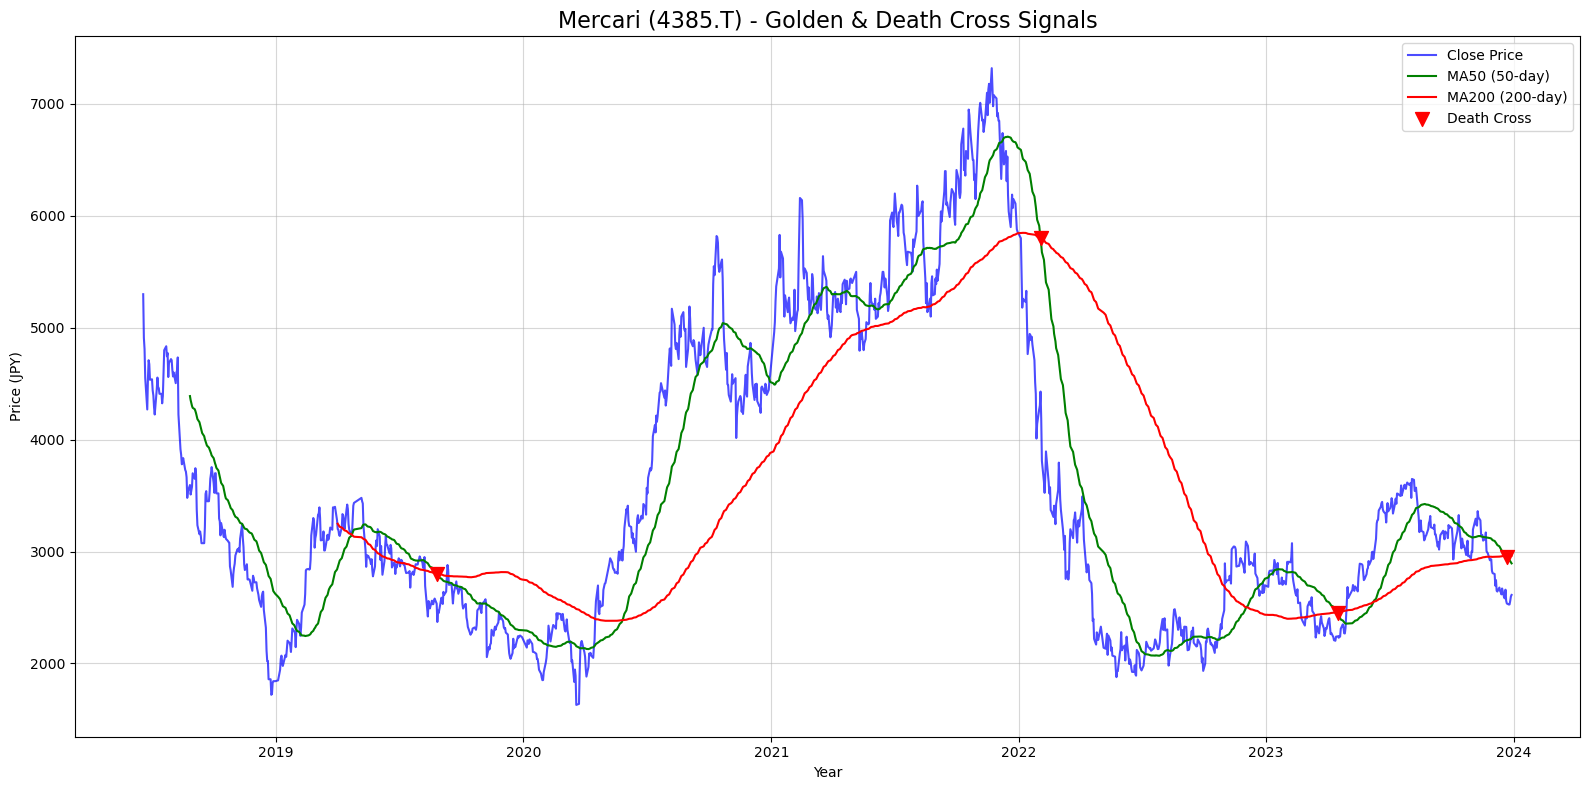

In [7]:
#  Plot price with Golden & Death Cross markers
plt.figure(figsize=(16, 8))
plt.plot(mercari.index, mercari['Close'], label='Close Price', color='blue', alpha=0.7)
plt.plot(mercari.index, mercari['MA50'], label='MA50 (50-day)', color='green', linewidth=1.5)
plt.plot(mercari.index, mercari['MA200'], label='MA200 (200-day)', color='red', linewidth=1.5)

# Add Golden Cross markers (▲)

if len(golden_cross_dates)< 0 :
 plt.scatter(
       golden_cross_dates,
       mercari.loc[golden_cross_dates,"MA50"],
       color = 'green',
       s = 100,
       marker="^",
       label= 'Golden Cross',
    )
 
if len(death_cross_dates) > 0:
    plt.scatter(
        death_cross_dates,
        mercari.loc[death_cross_dates, 'MA50'],
        color='red',
        s=100,
        marker='v',      # triangle down
        label='Death Cross',
        zorder=5
    ) 

plt.title("Mercari (4385.T) - Golden & Death Cross Signals", fontsize=16)
plt.ylabel("Price (JPY)")
plt.xlabel("Year")
plt.legend()
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

In [14]:
mercari = yf.download('4385.T', start='2018-01-01', end='2024-01-01', auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


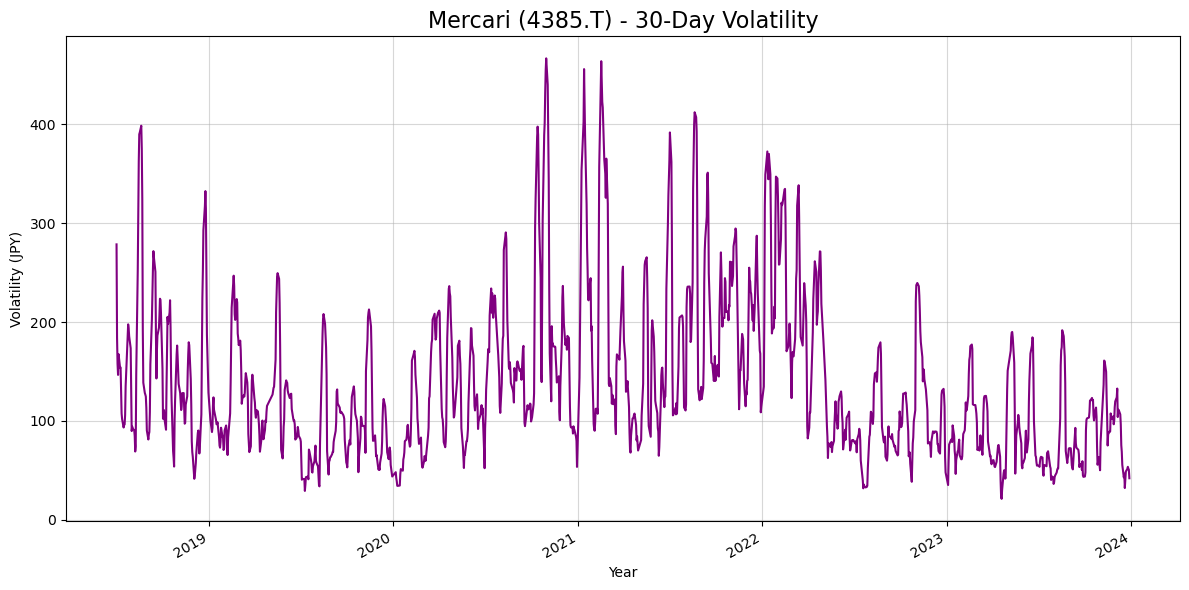

In [15]:
#Analyze voltality !
mercari['Volatility'] = mercari['Close'].rolling(window=10).std()

mercari["Volatility"].plot(figsize=(12,6),color= "Purple",linewidth = 1.5)
plt.title("Mercari (4385.T) - 30-Day Volatility", fontsize=16)
plt.ylabel("Volatility (JPY)")
plt.xlabel("Year")
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()


In [24]:
#Make Sure Index Is Proper DatetimeIndex
# Ensure the index is datetime and sorted
mercari.index = pd.to_datetime(mercari.index)
mercari.sort_index(inplace=True)
monthly_close = mercari['Close'].resample('M').last()  

In [ ]:
# Calculate monthly returns 
import pandas as pd

# Ensure clean index

mercari.index = pd.to_datetime(mercari.index)
mercari.sort_index(inplace=True)

# Resample to month-end
monthly_close = mercari['Close'].resample('M').last()

# Calculate monthly % returns
monthly_returns = monthly_close.pct_change() * 100

# Drop NaN
monthly_returns_clean = monthly_returns.dropna()

# Print first 10
print("Monthly Returns (%):")
print(monthly_returns_clean.head(10).round(2))


avg_return = monthly_returns_clean.mean()
best_return = monthly_returns_clean.max()
worst_return = monthly_returns_clean.min()

# Convert to float to avoid formatting error
avg_return = float(avg_return)
best_return = float(best_return)
worst_return = float(worst_return)

# Now print safely
print(f"\nAverage monthly return: {avg_return:.2f}%")
print(f"Best month: {best_return:.2f}%")
print(f"Worst month: {worst_return:.2f}%")

Monthly Returns (%):
Ticker      4385.T
Date              
2018-07-31    3.86
2018-08-31  -21.44
2018-09-30    1.49
2018-10-31  -23.94
2018-11-30   -4.59
2018-12-31  -32.40
2019-01-31   24.92
2019-02-28   35.59
2019-03-31    8.97
2019-04-30    1.03

Average monthly return: 0.25%
Best month: 35.59%
Worst month: -32.40%


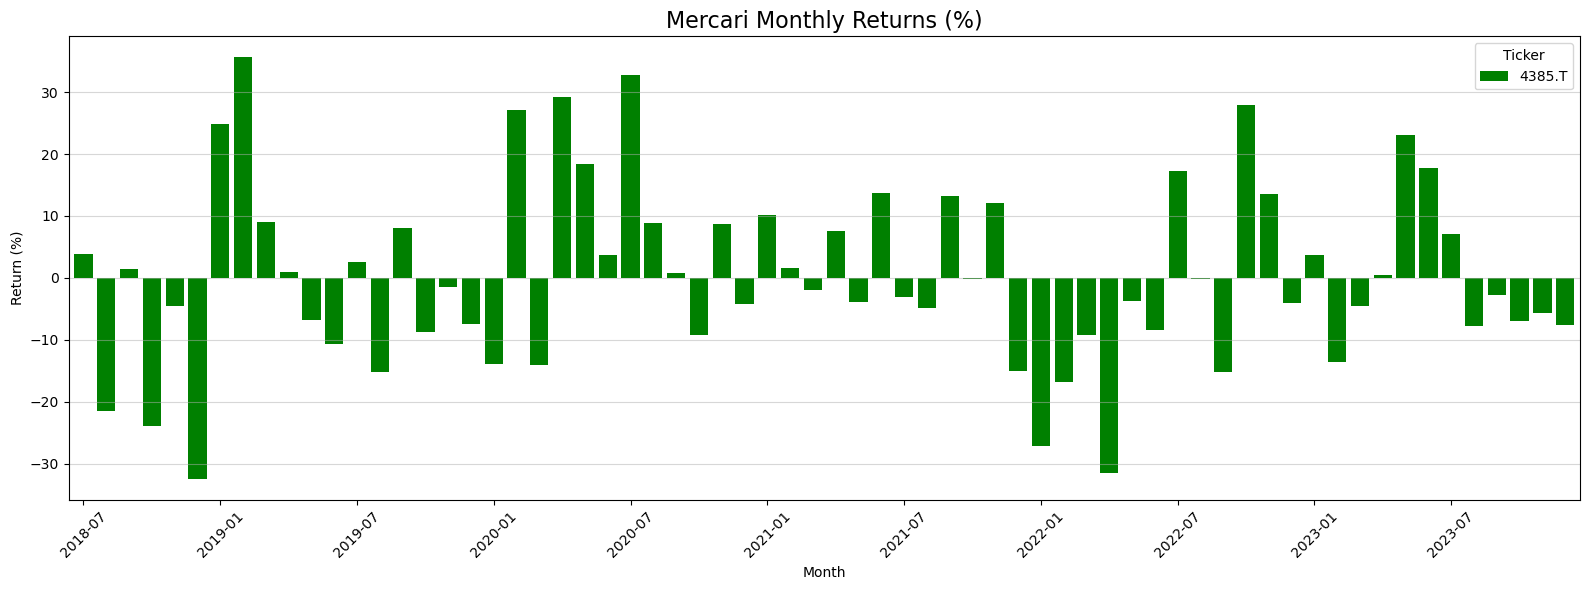

In [ ]:
# Ensure clean numeric series
returns = monthly_returns_clean.astype(float)

# Use .values to iterate over numbers, not index
colors = ['green' if x > 0 else 'red' for x in returns.values]

# Plot
returns.plot(kind='bar', figsize=(16, 6), color=colors, width=0.8)
plt.title("Mercari Monthly Returns (%)", fontsize=16)
plt.ylabel("Return (%)")
plt.xlabel("Month")

# Improve x-axis labels
ax = plt.gca()
ax.set_xticks(range(0, len(returns), 6))
ax.set_xticklabels([date.strftime('%Y-%m') for date in returns.index[::6]], rotation=45)

plt.grid(True, axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

In [34]:
# Recreate moving averages
mercari['MA50'] = mercari['Close'].rolling(window=50).mean()
mercari['MA200'] = mercari['Close'].rolling(window=200).mean()
mercari['Volatility'] = mercari['Close'].rolling(window=30).std()

# Check if they exist
print("Columns in mercari:", mercari.columns.tolist())

Columns in mercari: [('Close', '4385.T'), ('High', '4385.T'), ('Low', '4385.T'), ('Open', '4385.T'), ('Volume', '4385.T'), ('Volatility', ''), ('MA50', ''), ('MA200', '')]


In [40]:
# Step 1: Ensure 'Close' is a Series
close = mercari['Close'].squeeze()

# Step 2: Recompute indicators on clean series
ma50 = close.rolling(window=50).mean()
ma200 = close.rolling(window=200).mean()
volatility = close.rolling(window=30).std()

# Step 3: Build DataFrame
output = pd.DataFrame({
    'Close': close,
    'MA50': ma50,
    'MA200': ma200,
    'Volatility': volatility
}, index=close.index)

# Step 4: Drop only fully empty rows
output_clean = output.dropna()

# Debug
print("Non-NaN count after cleanup:")
print(output_clean.count())
print(f"Shape to save: {output_clean.shape}")

# Step 5: Save
output_clean.to_csv('mercari_analysis.csv')


Non-NaN count after cleanup:
Close         1159
MA50          1159
MA200         1159
Volatility    1159
dtype: int64
Shape to save: (1159, 4)
